<a href="https://colab.research.google.com/github/rikasyahriani/MIDTERMRIKA/blob/main/EndTermTask_Rika_Syahriani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data (optional but recommended for GANs)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Print shape of the dataset
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)


In [ ]:
import tensorflow as tf

# Normalize data to [-1, 1]
x_train = (x_train - 0.5) * 2  # Scale to [-1, 1]

# Create a TensorFlow dataset
batch_size = 128
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(50000).batch(batch_size)

print(f"Dataset prepared with batch size: {batch_size}")


Dataset prepared with batch size: 128


In [ ]:
from tensorflow.keras import layers

def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, activation="relu", input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(1024, activation="relu"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(32 * 32 * 3, activation="tanh"),  # Output CIFAR-10 image (32x32x3)
        layers.Reshape((32, 32, 3))
    ])
    return model

latent_dim = 100  # Dimension of the noise vector
generator = build_generator(latent_dim)
generator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │          25,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3072)                │       3,148,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 32, 3)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,838,720 (14.64 MB)

 Trainable params: 3,835,136 (14.63 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [ ]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation="relu"),
        layers.LeakyReLU(0.2),
        layers.Dense(256, activation="relu"),
        layers.LeakyReLU(0.2),
        layers.Dense(1, activation="sigmoid")  # Output: Real (1) or Fake (0)
    ])
    return model

discriminator = build_discriminator()
discriminator.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,704,961 (6.50 MB)

 Trainable params: 1,704,961 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import Model

# Compile discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

# Build and compile GAN
discriminator.trainable = False  # Freeze discriminator when training GAN
gan_input = layers.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy")

gan.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 32, 32, 3)           │       3,838,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │       1,704,961 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,543,681 (21.15 MB)

 Trainable params: 3,835,136 (14.63 MB)

 Non-trainable params: 1,708,545 (6.52 MB)

In [ ]:
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to range [-1, 1]
x_train = (x_train - 127.5) / 127.5  # Normalisasi ke [-1, 1]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize images to range [-1, 1]
x_train = (x_train - 127.5) / 127.5

# Generator
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(256, activation="relu", input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(1024, activation="relu"),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Dense(32 * 32 * 3, activation="tanh"),
        layers.Reshape((32, 32, 3))
    ])
    return model

latent_dim = 100
generator = build_generator(latent_dim)

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation="relu"),
        layers.LeakyReLU(0.2),
        layers.Dense(256, activation="relu"),
        layers.LeakyReLU(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy", metrics=["accuracy"])

# GAN
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss="binary_crossentropy")

# Fungsi pelatihan GAN
def train_gan(epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # 1. Train Discriminator
        real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 2. Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % 100 == 0:
            print(f"{epoch}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

# Latih GAN
epochs = 1000
batch_size = 128
train_gan(epochs, batch_size, latent_dim)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0/1000 [D loss: 0.4846054017543793, acc.: 73.828125%] [G loss: [array(0.6011735, dtype=float32), array(0.6011735, dtype=float32), array(0.4921875, dtype=float32)]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


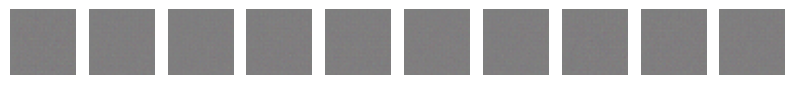

In [ ]:
# Impor library yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np  # Untuk membuat noise
import matplotlib.pyplot as plt  # Untuk visualisasi gambar

# Definisi fungsi generator
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', activation='tanh')
    ])
    return model

# Inisialisasi model generator
latent_dim = 100
generator = build_generator(latent_dim)

# Fungsi untuk visualisasi gambar yang dihasilkan
def generate_and_save_images(generator, latent_dim, num_examples=10):
    noise = np.random.normal(0, 1, (num_examples, latent_dim))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Kembalikan ke skala [0, 1]

    # Plot gambar
    plt.figure(figsize=(10, 2))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.show()

# Panggil fungsi generate untuk menampilkan gambar
generate_and_save_images(generator, latent_dim)


In [ ]:
def build_discriminator(input_shape=(32, 32, 3)):
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    fake_image = generator(gan_input)
    gan_output = discriminator(fake_image)
    gan_model = tf.keras.Model(gan_input, gan_output)
    gan_model.compile(optimizer='adam', loss='binary_crossentropy')
    return gan_model

gan = build_gan(generator, discriminator)


In [ ]:
def train_gan(generator, discriminator, gan, x_train, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # Pilih batch data asli
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]
        real_labels = np.ones((batch_size, 1))

        # Buat batch data palsu
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)
        fake_labels = np.zeros((batch_size, 1))

        # Latih discriminator
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Latih generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))  # Generator ingin menipu discriminator
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Cetak log
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")


In [ ]:
generator.save("gan_generator.h5")
discriminator.save("gan_discriminator.h5")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tentukan dimensi laten (sama dengan yang digunakan di model generator)
latent_dim = 100

# Buat input noise acak
noise = np.random.normal(0, 1, (16, latent_dim))  # 16 gambar acak

# Hasilkan gambar menggunakan generator
generated_images = generator.predict(noise)

# Normalisasi gambar ke rentang [0, 1]
generated_images = (generated_images + 1) / 2.0  # Menyesuaikan rentang nilai



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


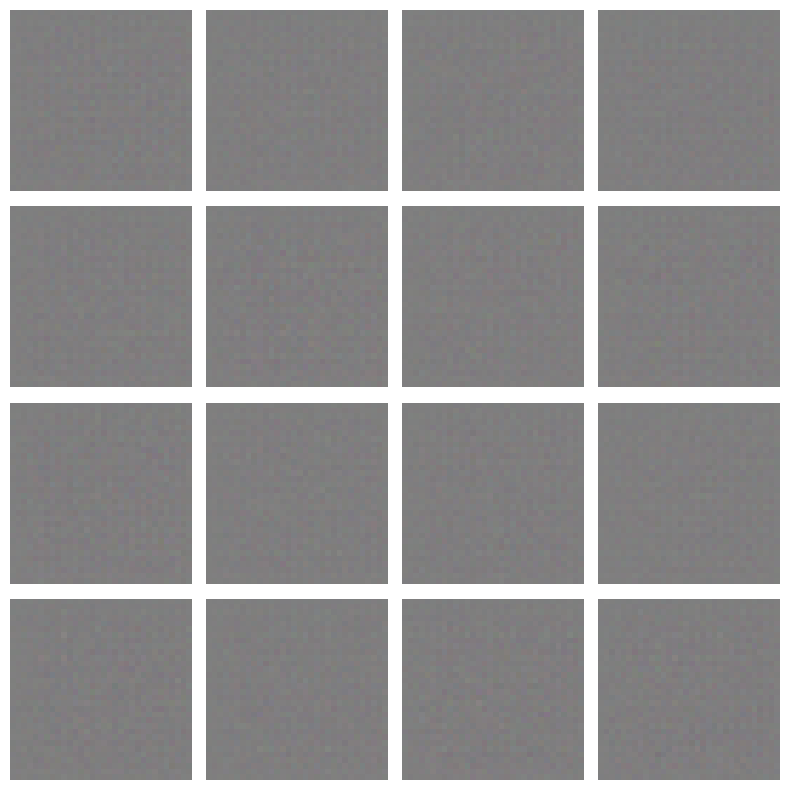

In [ ]:
# Plot gambar-gambar yang dihasilkan
fig, axes = plt.subplots(4, 4, figsize=(8, 8))  # 4x4 grid
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(generated_images[i])  # Tampilkan gambar
    ax.axis('off')  # Hilangkan axis

plt.tight_layout()
plt.show()


In [ ]:
# Modifikasi train_gan() untuk mencetak loss
def train_gan(generator, discriminator, gan, x_train, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # Latih Discriminator
        real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * (d_loss_real + d_loss_fake)

        # Latih Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Cetak loss setiap beberapa epoch
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")
            save_generated_images(generator, latent_dim, epoch)


In [ ]:
# Fungsi menyimpan checkpoint generator
def save_model_checkpoint(generator, epoch):
    generator.save(f"generator_checkpoint_epoch_{epoch}.h5")
    print(f"Model generator disimpan pada epoch {epoch}")

# Fungsi training GAN
def train_gan(generator, discriminator, gan, x_train, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # Train discriminator
        real_images = x_train[np.random.randint(0, x_train.shape[0], batch_size)]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        print(f"{epoch + 1}/{epochs}, Discriminator Loss: {d_loss:.4f}, Generator Loss: {g_loss:.4f}")

        # Simpan checkpoint setiap 500 epoch
        if (epoch + 1) % 500 == 0:
            save_model_checkpoint(generator, epoch + 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Muat dataset CIFAR-10
(x_train, y_train), (_, _) = cifar10.load_data()

# Normalisasi data ke range [-1, 1] agar cocok dengan output generator
x_train = (x_train.astype('float32') - 127.5) / 127.5

print(f"Shape dataset: {x_train.shape}")


Shape dataset: (50000, 32, 32, 3)


In [ ]:
def train_gan(generator, discriminator, gan, x_train, epochs, batch_size, latent_dim):
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_images = x_train[idx]
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_images = generator.predict(noise, verbose=0)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)  # Hitung rata-rata kerugian discriminator

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress (ubah nilai ke float scalar)
        print(f"{epoch + 1}/{epochs}, Discriminator Loss: {d_loss[0]:.4f}, Generator Loss: {g_loss:.4f}")

        # Simpan checkpoint setiap 500 epoch
        if (epoch + 1) % 500 == 0:
            save_model_checkpoint(generator, epoch + 1)


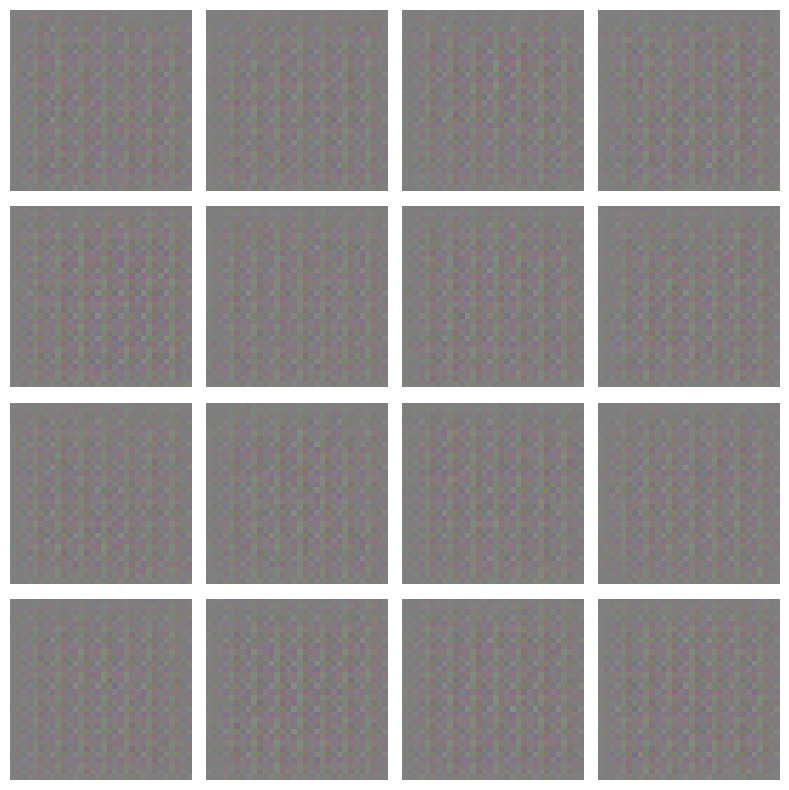

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar yang dihasilkan
def plot_generated_images(generator, latent_dim, examples=16, figsize=(8, 8)):
    noise = np.random.normal(0, 1, (examples, latent_dim))
    generated_images = generator.predict(noise, verbose=0)
    generated_images = (generated_images + 1) / 2.0  # Ubah range ke [0,1] agar terlihat jelas

    fig, axes = plt.subplots(4, 4, figsize=figsize)
    count = 0
    for i in range(4):
        for j in range(4):
            axes[i, j].imshow(generated_images[count])
            axes[i, j].axis('off')
            count += 1
    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi
plot_generated_images(generator, latent_dim)


In [ ]:
# Menyimpan model generator
generator.save('gan_generator_cifar10.h5')
print("Model generator berhasil disimpan.")


Model generator berhasil disimpan.


In [ ]:
!pip install tensorflow-gan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 7.8 MB/s eta 0:00:00
